# CRYO2ICE Track Information Extraction

This notebook extracts key information for each CRYO2ICE track to generate reference tables for scientific analysis and publication. The CRYO2ICE mission combines data from CryoSat-2 (CS2) and ICESat-2 (IS2) satellites over polar regions.

## Information Extracted per Track:
- **ICESat-2 (IS2) data:**
  - Reference ground track (RGT) number
  - Start time (UTC)
  - End time (UTC)

- **CryoSat-2 (CS2) data:**
  - Absolute orbit number
  - Relative orbit number 
  - Start time (TAI)
  - End time (TAI)

- **Combined information:**
  - Time delta between satellite observations

## Cell 2: Import Required Packages

In [2]:
# Import required packages
import h5py
import numpy as np 
import netCDF4
import pandas as pd
import os
import glob
from datetime import datetime

print("Packages successfully imported")

Packages successfully imported


## Cell 3: Data Loading Configuration for Ross and Weddell Seas (2021-2024)

In [3]:
# Configuration parameters for both Weddell and Ross sea regions (2021-2024)
# Base directory for data
DATA_BASE_PATH = r"D:\phd\data\chap2"

# File extensions
CS2_FILE_EXTENSION = ".nc"  # CryoSat-2 files
IS2_FILE_EXTENSION = ".h5"  # ICESat-2 files

# Years to process
YEARS = ["2021", "2022", "2023", "2024"]

# ===== WEDDELL SEA PATHS =====
# CryoSat-2 data for Weddell Sea
CS2_WEDDELL_PATH = os.path.join(DATA_BASE_PATH, "cs2_l2_sar_basel_e_weddell_winter")

# ICESat-2 ATL10v6 data for Weddell Sea
IS2_WEDDELL_PATH = os.path.join(DATA_BASE_PATH, "is2_atl10v6_weddell_winter")

# ===== ROSS SEA PATHS =====
# CryoSat-2 data for Ross Sea (has hemisphere subdirectories)
CS2_ROSS_PATH = os.path.join(DATA_BASE_PATH, "cs2_l2_sar_basel_e_ross_winter")
CS2_ROSS_HEMISPHERES = ["EH", "WH"]  # Eastern: 160E to 180E, Western: 180W to 140W

# ICESat-2 ATL10v6 data for Ross Sea
IS2_ROSS_PATH = os.path.join(DATA_BASE_PATH, "is2_atl10v6_ross_winter")

# ===== REGION SELECTION =====
# Set which regions to process (options: 'weddell', 'ross', 'both')
REGION = 'both'

# Set whether to include each dataset type
INCLUDE_CS2 = True
INCLUDE_IS2 = True

# ===== OUTPUT CONFIGURATION =====
# Output directory and filename for generated CSV
OUTPUT_DIR = os.path.join(DATA_BASE_PATH, "output")
OUTPUT_FILENAME = "cryo2ice_tracks_2021_2024.csv"
OUTPUT_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILENAME)

# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

print("Data loading configuration complete")

Created output directory: D:\phd\data\chap2\output
Data loading configuration complete


## Cell 4: Load CryoSat-2 Data for Weddell Sea Analysis (2021-2024)

In [4]:
#%% CryoSat-2 Data for Weddell Sea Analysis

# Base directory for CS2 data in Weddell Sea region
cs2_base_path = r"D:\phd\data\chap2\cs2_l2_sar_basel_e_weddell_winter"

# Years to process
years = ["2021", "2022", "2023", "2024"]

# File extension for CryoSat-2 data
cs2_file_extension = ".nc"  # Changed to .hnc extension as specified

# Collect all files across the years
cs2_files_weddell = []
cs2_file_count_by_year = {}

# Process each year subfolder
for year in years:
    year_path = os.path.join(cs2_base_path, year)
    
    # Skip if directory doesn't exist
    if not os.path.exists(year_path):
        print(f"Warning: Directory for year {year} not found at {year_path}")
        continue
    
    # Find all .hnc files in this year's directory
    year_files = glob.glob(os.path.join(year_path, f"*{cs2_file_extension}"))
    
    # Store count by year
    cs2_file_count_by_year[year] = len(year_files)
    
    # Add to master list
    cs2_files_weddell.extend(year_files)

# Store in variable for later use
files_check_CS2 = cs2_files_weddell

# Print summary of found files
print(f"Found {len(cs2_files_weddell)} total CS2 files for Weddell Sea analysis")
print("Files by year:")
for year, count in cs2_file_count_by_year.items():
    print(f"  {year}: {count} files")

# Check for expected file pattern
if cs2_files_weddell:
    sample_files = [os.path.basename(f) for f in cs2_files_weddell[:3]]
    print(f"\nSample filenames: {', '.join(sample_files)}")
    
    # Verify filename pattern matches the expected format (e.g., CS_LTA__SIR_SAR_2__...)
    expected_prefix = "CS_LTA__SIR_SAR_2__"
    pattern_matches = all(f.startswith(expected_prefix) for f in sample_files[:1] if sample_files)
    
    if pattern_matches:
        print("File pattern validation: File names match expected CryoSat-2 format.")
    else:
        print("Warning: Some files may not match expected CryoSat-2 naming pattern.")

Found 5370 total CS2 files for Weddell Sea analysis
Files by year:
  2021: 1285 files
  2022: 1280 files
  2023: 1403 files
  2024: 1402 files

Sample filenames: CS_LTA__SIR_SAR_2__20210501T004324_20210501T004940_E001_segment_640.nc, CS_LTA__SIR_SAR_2__20210501T084902_20210501T084944_E001_segment_641.nc, CS_LTA__SIR_SAR_2__20210501T102753_20210501T102933_E001_segment_642.nc
File pattern validation: File names match expected CryoSat-2 format.


## Cell 5: Load ICESat-2 ATL10 Version 6 Data for Weddell Sea Analysis (2021-2024)

In [5]:
#%% ICESat-2 ATL10 Version 6 Data for Weddell Sea Analysis

# Use configured paths from cell 3
is2_base_path = IS2_WEDDELL_PATH

# Years to process
years = YEARS

# File extension for ICESat-2 data
is2_file_extension = IS2_FILE_EXTENSION

# Collect all files across the years
is2_files_weddell = []
is2_file_count_by_year = {}

# Process each year subfolder
for year in years:
    year_path = os.path.join(is2_base_path, year)
    
    # Skip if directory doesn't exist
    if not os.path.exists(year_path):
        print(f"Warning: Directory for year {year} not found at {year_path}")
        continue
    
    # Find all .h5 files in this year's directory
    year_files = glob.glob(os.path.join(year_path, f"*{is2_file_extension}"))
    
    # Store count by year
    is2_file_count_by_year[year] = len(year_files)
    
    # Add to master list
    is2_files_weddell.extend(year_files)

# Store all IS2 files from Weddell Sea for later use
files_total_IS2 = is2_files_weddell

# Print summary of found files
print(f"Found {len(is2_files_weddell)} total IS2 ATL10v6 files for Weddell Sea analysis")
print("Files by year:")
for year, count in is2_file_count_by_year.items():
    print(f"  {year}: {count} files")

# Check for expected file pattern
if is2_files_weddell:
    sample_files = [os.path.basename(f) for f in is2_files_weddell[:3]]
    print(f"\nSample filenames: {', '.join(sample_files)}")
    
    # Verify filename pattern matches the expected format (e.g., ATL10-02_*)
    expected_prefix = "ATL10-"
    pattern_matches = all(f.startswith(expected_prefix) for f in sample_files[:1] if sample_files)
    
    if pattern_matches:
        print("File pattern validation: File names match expected ICESat-2 ATL10 format.")
    else:
        print("Warning: Some files may not match expected ICESat-2 ATL10 naming pattern.")

Found 4538 total IS2 ATL10v6 files for Weddell Sea analysis
Files by year:
  2021: 1270 files
  2022: 1319 files
  2023: 1010 files
  2024: 939 files

Sample filenames: ATL10-02_20210501044315_05711101_006_01.h5, ATL10-02_20210501061732_05721101_006_01.h5, ATL10-02_20210501075149_05731101_006_01.h5
File pattern validation: File names match expected ICESat-2 ATL10 format.


## Cell 6: Load CryoSat-2 Data for Ross Sea Analysis by Hemisphere (2021-2024)

In [6]:
#%% CryoSat-2 Data for Ross Sea Analysis by Hemisphere (2021-2024)

# Base directory for CS2 data in Ross Sea region
cs2_ross_base_path = r"D:\phd\data\chap2\cs2_l2_sar_basel_e_ross_winter"

# Hemispheres to process (Eastern: 160E to 180E, Western: 180W to 140W)
hemispheres = ["EH", "WH"]

# Years to process
years = ["2021", "2022", "2023", "2024"]

# File extension for CryoSat-2 data
cs2_file_extension = ".nc"

# Collect all files across hemispheres and years
cs2_files_ross = []
cs2_file_count_by_hemisphere = {}

# Process each hemisphere
for hemisphere in hemispheres:
    hemisphere_path = os.path.join(cs2_ross_base_path, hemisphere)
    
    # Skip if hemisphere directory doesn't exist
    if not os.path.exists(hemisphere_path):
        print(f"Warning: Directory for hemisphere {hemisphere} not found at {hemisphere_path}")
        continue
    
    # Initialize counter for this hemisphere
    cs2_file_count_by_hemisphere[hemisphere] = {}
    hemisphere_files = []
    
    # Process each year within this hemisphere
    for year in years:
        year_path = os.path.join(hemisphere_path, year)
        
        # Skip if year directory doesn't exist
        if not os.path.exists(year_path):
            print(f"Warning: Directory for year {year} in {hemisphere} not found at {year_path}")
            continue
        
        # Find all .nc files in this year's directory
        year_files = glob.glob(os.path.join(year_path, f"*{cs2_file_extension}"))
        
        # Store count by year for this hemisphere
        cs2_file_count_by_hemisphere[hemisphere][year] = len(year_files)
        
        # Add to hemisphere list
        hemisphere_files.extend(year_files)
    
    # Add to master list
    cs2_files_ross.extend(hemisphere_files)
    print(f"Found {len(hemisphere_files)} CS2 files for {hemisphere} hemisphere in Ross Sea")

# Store in variable for later use
files_check_CS2_ross = cs2_files_ross

# Print detailed summary of found files
print(f"\nFound {len(cs2_files_ross)} total CS2 files for Ross Sea analysis")
print("\nFiles by hemisphere and year:")
for hemisphere, years_dict in cs2_file_count_by_hemisphere.items():
    hemisphere_total = sum(years_dict.values())
    print(f"  {hemisphere} hemisphere: {hemisphere_total} files")
    for year, count in years_dict.items():
        print(f"    {year}: {count} files")

# Check for expected file pattern
if cs2_files_ross:
    sample_files = [os.path.basename(f) for f in cs2_files_ross[:3]]
    print(f"\nSample filenames: {', '.join(sample_files)}")
    
    # Verify filename pattern matches the expected format
    expected_prefix = "CS_LTA__SIR_SAR_2__"
    pattern_matches = all(f.startswith(expected_prefix) for f in sample_files[:1] if sample_files)
    
    if pattern_matches:
        print("File pattern validation: File names match expected CryoSat-2 format.")
    else:
        print("Warning: Some files may not match expected CryoSat-2 naming pattern.")

Found 1456 CS2 files for EH hemisphere in Ross Sea
Found 2623 CS2 files for WH hemisphere in Ross Sea

Found 4079 total CS2 files for Ross Sea analysis

Files by hemisphere and year:
  EH hemisphere: 1456 files
    2021: 364 files
    2022: 360 files
    2023: 367 files
    2024: 365 files
  WH hemisphere: 2623 files
    2021: 658 files
    2022: 651 files
    2023: 653 files
    2024: 661 files

Sample filenames: CS_LTA__SIR_SAR_2__20210501T103911_20210501T103930_E001_segment_184.nc, CS_LTA__SIR_SAR_2__20210501T104020_20210501T104211_E001_segment_185.nc, CS_LTA__SIR_SAR_2__20210501T220233_20210501T220350_E001_segment_186.nc
File pattern validation: File names match expected CryoSat-2 format.


## Cell 7: Load ICESat-2 ATL10 Version 6 Data for Ross Sea Analysis (2021-2024)

In [7]:
#%% ICESat-2 ATL10 Version 6 Data for Ross Sea Analysis

# Base directory for IS2 ATL10v6 data in Ross Sea region
is2_ross_base_path = r"D:\phd\data\chap2\is2_atl10v6_ross_winter"

# Years to process
years = ["2021", "2022", "2023", "2024"]

# File extension for ICESat-2 data
is2_file_extension = ".h5"

# Collect all files across the years
is2_files_ross = []
is2_file_count_by_year = {}

# Process each year subfolder
for year in years:
    year_path = os.path.join(is2_ross_base_path, year)
    
    # Skip if directory doesn't exist
    if not os.path.exists(year_path):
        print(f"Warning: Directory for year {year} not found at {year_path}")
        continue
    
    # Find all .h5 files in this year's directory
    year_files = glob.glob(os.path.join(year_path, f"*{is2_file_extension}"))
    
    # Store count by year
    is2_file_count_by_year[year] = len(year_files)
    
    # Add to master list
    is2_files_ross.extend(year_files)

# Store all IS2 files from Ross Sea
files_total_IS2_ross = is2_files_ross

# Print summary of found files
print(f"Found {len(is2_files_ross)} total IS2 ATL10v6 files for Ross Sea analysis")
print("Files by year:")
for year, count in is2_file_count_by_year.items():
    print(f"  {year}: {count} files")

# Check for expected file pattern
if is2_files_ross:
    sample_files = [os.path.basename(f) for f in is2_files_ross[:3]]
    print(f"\nSample filenames: {', '.join(sample_files)}")
    
    # Verify filename pattern matches the expected format (e.g., ATL10-02_...)
    expected_prefix = "ATL10-"
    pattern_matches = all(f.startswith(expected_prefix) for f in sample_files[:1] if sample_files)
    
    if pattern_matches:
        print("File pattern validation: File names match expected ICESat-2 ATL10 format.")
    else:
        print("Warning: Some files may not match expected ICESat-2 ATL10 naming pattern.")

Found 3612 total IS2 ATL10v6 files for Ross Sea analysis
Files by year:
  2021: 972 files
  2022: 987 files
  2023: 928 files
  2024: 725 files

Sample filenames: ATL10-02_20210430160856_05631101_006_02.h5, ATL10-02_20210430174313_05641101_006_02.h5, ATL10-02_20210501044315_05711101_006_01.h5
File pattern validation: File names match expected ICESat-2 ATL10 format.


## Cell 8: Combined Dataset Selection for Analysis (2021-2024)

In [8]:
#%% Combine Datasets for 2021-2024 Analysis

# Use the datasets already loaded from previous cells
print("Preparing combined dataset from Weddell and Ross Sea regions (2021-2024)")

# Create a dictionary to organize datasets by region
combined_datasets = {
    'weddell_sea': {
        'cs2': {
            'files': cs2_files_weddell,
            'count': len(cs2_files_weddell),
            'description': 'CryoSat-2 data for Weddell Sea (2021-2024)'
        },
        'is2': {
            'files': is2_files_weddell,
            'count': len(is2_files_weddell),
            'description': 'ICESat-2 ATL10 Version 6 data for Weddell Sea (2021-2024)'
        }
    },
    'ross_sea': {
        'cs2': {
            'files': cs2_files_ross,
            'count': len(cs2_files_ross),
            'description': 'CryoSat-2 data for Ross Sea (2021-2024)'
        },
        'is2': {
            'files': is2_files_ross,
            'count': len(is2_files_ross),
            'description': 'ICESat-2 ATL10 Version 6 data for Ross Sea (2021-2024)'
        }
    }
}

# Configuration for analysis
# Use the configuration variables from Cell 3
region = REGION  # Options: 'weddell', 'ross', 'both'
include_cs2 = INCLUDE_CS2
include_is2 = INCLUDE_IS2

# Initialize selected file lists
selected_cs2_files = []
selected_is2_files = []

# Select files based on configuration
if region == 'weddell':
    if include_cs2:
        selected_cs2_files = combined_datasets['weddell_sea']['cs2']['files']
    if include_is2:
        selected_is2_files = combined_datasets['weddell_sea']['is2']['files']
    print(f"Selected Weddell Sea region for analysis")
elif region == 'ross':
    if include_cs2:
        selected_cs2_files = combined_datasets['ross_sea']['cs2']['files']
    if include_is2:
        selected_is2_files = combined_datasets['ross_sea']['is2']['files']
    print(f"Selected Ross Sea region for analysis")
elif region == 'both':
    if include_cs2:
        selected_cs2_files = combined_datasets['weddell_sea']['cs2']['files'] + combined_datasets['ross_sea']['cs2']['files']
    if include_is2:
        selected_is2_files = combined_datasets['weddell_sea']['is2']['files'] + combined_datasets['ross_sea']['is2']['files']
    print(f"Selected both Weddell and Ross Sea regions for analysis")

# Store in standard variables for downstream processing
files_check_CS2 = selected_cs2_files
files_total_IS2 = selected_is2_files

# Print summary of dataset to be processed
print(f"\nSelected {len(files_total_IS2)} ICESat-2 files and {len(files_check_CS2)} CryoSat-2 files for processing")

# Display counts by region if both regions are selected
if region == 'both':
    print("\nBreakdown by region:")
    print(f"  Weddell Sea: {combined_datasets['weddell_sea']['cs2']['count']} CS2 files, "
          f"{combined_datasets['weddell_sea']['is2']['count']} IS2 files")
    print(f"  Ross Sea: {combined_datasets['ross_sea']['cs2']['count']} CS2 files, "
          f"{combined_datasets['ross_sea']['is2']['count']} IS2 files")

print("\nDataset selection complete. Ready for CRYO2ICE track information extraction.")

Preparing combined dataset from Weddell and Ross Sea regions (2021-2024)
Selected both Weddell and Ross Sea regions for analysis

Selected 8150 ICESat-2 files and 9449 CryoSat-2 files for processing

Breakdown by region:
  Weddell Sea: 5370 CS2 files, 4538 IS2 files
  Ross Sea: 4079 CS2 files, 3612 IS2 files

Dataset selection complete. Ready for CRYO2ICE track information extraction.


## Cell 9: Extract CRYO2ICE Track Information for Weddell and Ross Sea Analysis (2021-2024)

In [9]:
#%% Extract CRYO2ICE Track Information for Weddell and Ross Sea Analysis (2021-2024)

def extract_track_info():

    """
    Extract track information from paired CS2 and IS2 data files for Weddell and Ross Sea regions (2021-2024)
    Returns a pandas DataFrame with track information including satellite identifiers, timestamps, and orbital parameters
    """
    
    # Check if files are available for processing
    if not files_check_CS2 or not files_total_IS2:
        print("Error: No files available for processing. Check previous data loading steps.")
        return pd.DataFrame()
    
    # Check if file counts match between CS2 and IS2 datasets
    if len(files_check_CS2) != len(files_total_IS2):
        print(f"Warning: Number of CS2 files ({len(files_check_CS2)}) does not match IS2 files ({len(files_total_IS2)})")
        max_files = min(len(files_check_CS2), len(files_total_IS2))
        print(f"Processing only the first {max_files} paired files")
    else:
        max_files = len(files_total_IS2)
        print(f"Processing {max_files} paired files from Weddell and Ross Sea regions")
    
    # List of indices for all files to process
    list_total = np.arange(0, max_files)
    
    # Initialize data collection list
    appended_data = []
    error_count = 0
    
    # Process each paired file
    for k in list_total:
        try:
            # Identify file region (Weddell or Ross)
            is_weddell_cs2 = CS2_WEDDELL_PATH in files_check_CS2[k]
            is_weddell_is2 = IS2_WEDDELL_PATH in files_total_IS2[k]
            
            region = "Weddell Sea" if (is_weddell_cs2 and is_weddell_is2) else "Ross Sea"
            
            # Extract CS2 parameters
            with netCDF4.Dataset(files_check_CS2[k], 'r') as ds:
                rel_orbit_number = ds.getncattr('rel_orbit_number')
                abs_orbit_number = ds.getncattr('abs_orbit_number')
                start_CS2_TAI = ds.getncattr('first_record_time')
                start_CS2_TAI = start_CS2_TAI[4:30]  # Remove irrelevant characters
                end_CS2_TAI = ds.getncattr('last_record_time')
                end_CS2_TAI = end_CS2_TAI[4:30]  # Remove irrelevant characters
                
                # Extract hemisphere for Ross Sea files (if available)
                hemisphere = ""
                if region == "Ross Sea":
                    if "EH" in files_check_CS2[k]:
                        hemisphere = "Eastern Hemisphere"
                    elif "WH" in files_check_CS2[k]:
                        hemisphere = "Western Hemisphere"
            
            # Extract IS2 parameters
            with h5py.File(files_total_IS2[k], "r") as f:
                start_IS2_UTC = str(f['ancillary_data/data_start_utc'][:])
                start_IS2_UTC = start_IS2_UTC[3:32-3]  # Remove irrelevant characters
                end_IS2_UTC = str(f['ancillary_data/data_end_utc'][:])
                end_IS2_UTC = end_IS2_UTC[3:32-3]  # Remove irrelevant characters
                IS2_RGT = f['ancillary_data/end_rgt'][:]
            
            # Calculate time delta between observations (in hours)
            IS2_time = datetime.strptime(start_IS2_UTC, '%Y-%m-%dT%H:%M:%S.%f')
            CS2_time = datetime.strptime(start_CS2_TAI, '%Y-%m-%dT%H:%M:%S.%f')
            time_delta = ((CS2_time-IS2_time).total_seconds())/(60*60)
            
            # Extract year from timestamp for grouping
            data_year = IS2_time.year
            
            # Create dataframe for this track
            df = pd.DataFrame(
                {
                    'region': region,
                    'hemisphere': hemisphere if region == "Ross Sea" else "N/A",
                    'year': data_year,
                    'IS2_RGT': IS2_RGT,
                    'start_IS2_UTC': start_IS2_UTC,
                    'stop_IS2_UTC': end_IS2_UTC,
                    'CS2_rel_orbit_number': rel_orbit_number, 
                    'CS2_abs_orbit_number': abs_orbit_number,
                    'start_CS2_TAI': start_CS2_TAI,
                    'stop_CS2_TAI': end_CS2_TAI,
                    'time_delta': time_delta,
                    'is2_file': os.path.basename(files_total_IS2[k]),
                    'cs2_file': os.path.basename(files_check_CS2[k])
                },
                index=[k]
            )
            
            # Append dataframe to list
            appended_data.append(df)
            
            # Print progress every 50 files
            if (k + 1) % 50 == 0:
                print(f"Processed {k + 1}/{max_files} files")
                
        except Exception as e:
            error_count += 1
            print(f"Error processing file pair {k}: {str(e)}")
            
            # Print additional debug info for troubleshooting
            if error_count <= 3:  # Limit debug output to first 3 errors
                print(f"  CS2 file: {os.path.basename(files_check_CS2[k]) if k < len(files_check_CS2) else 'N/A'}")
                print(f"  IS2 file: {os.path.basename(files_total_IS2[k]) if k < len(files_total_IS2) else 'N/A'}")
                print(f"  Exception details: {type(e).__name__}")
    
    # Concatenate all dataframes
    if appended_data:
        df_appended = pd.concat(appended_data)
        print(f"\nSuccessfully extracted information for {len(df_appended)} CRYO2ICE tracks")
        print(f"Failed to process {error_count} file pairs")
        
        # Print summary statistics by region
        if not df_appended.empty:
            region_counts = df_appended['region'].value_counts()
            print("\nTracks by region:")
            for region, count in region_counts.items():
                print(f"  {region}: {count} tracks")
            
            year_counts = df_appended['year'].value_counts().sort_index()
            print("\nTracks by year:")
            for year, count in year_counts.items():
                print(f"  {year}: {count} tracks")
        
        return df_appended
    else:
        print("No data was successfully processed")
        return pd.DataFrame()

# Extract track information
print("Extracting CRYO2ICE track information for Weddell and Ross Sea regions (2021-2024)...")
cryo2ice_tracks_df = extract_track_info()

# Display the first few rows of the data
if not cryo2ice_tracks_df.empty:
    print("\nSample of extracted track information:")
    display(cryo2ice_tracks_df.head())

Extracting CRYO2ICE track information for Weddell and Ross Sea regions (2021-2024)...
Processing only the first 8150 paired files
Processed 50/8150 files
Processed 100/8150 files
Processed 150/8150 files
Processed 200/8150 files
Processed 250/8150 files
Processed 300/8150 files
Processed 350/8150 files
Processed 400/8150 files
Processed 450/8150 files
Processed 500/8150 files
Processed 550/8150 files
Processed 600/8150 files
Processed 650/8150 files
Processed 700/8150 files
Processed 750/8150 files
Processed 800/8150 files
Processed 850/8150 files
Processed 900/8150 files
Processed 950/8150 files
Processed 1000/8150 files
Processed 1050/8150 files
Processed 1100/8150 files
Processed 1150/8150 files
Processed 1200/8150 files
Processed 1250/8150 files
Processed 1300/8150 files
Processed 1350/8150 files
Processed 1400/8150 files
Processed 1450/8150 files
Processed 1500/8150 files
Processed 1550/8150 files
Processed 1600/8150 files
Processed 1650/8150 files
Processed 1700/8150 files
Proces

,region,hemisphere,year,IS2_RGT,start_IS2_UTC,stop_IS2_UTC,CS2_rel_orbit_number,CS2_abs_orbit_number,start_CS2_TAI,stop_CS2_TAI,time_delta,is2_file,cs2_file
0,Weddell Sea,N/A,2021,571,2021-05-01T05:48:04.429982,2021-05-01T05:58:57.408725,1812,58635,2021-05-01T00:44:01.410863,2021-05-01T00:50:16.088638,-5.067505,ATL10-02_20210501044315_05711101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T004324_20210501T00...
1,Weddell Sea,N/A,2021,572,2021-05-01T07:31:17.344270,2021-05-01T07:34:06.958338,1817,58640,2021-05-01T08:49:39.252105,2021-05-01T08:50:20.873077,1.306086,ATL10-02_20210501061732_05721101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T084902_20210501T08...
2,Weddell Sea,N/A,2021,573,2021-05-01T08:55:43.148462,2021-05-01T09:08:57.184069,1818,58641,2021-05-01T10:28:29.840429,2021-05-01T10:30:09.730094,1.546303,ATL10-02_20210501075149_05731101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T102753_20210501T10...
3,Weddell Sea,N/A,2021,574,2021-05-01T10:29:33.152506,2021-05-01T10:32:55.961869,1819,58642,2021-05-01T12:03:42.449381,2021-05-01T12:10:42.725752,1.569249,ATL10-02_20210501092607_05741101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T120305_20210501T12...
4,Weddell Sea,N/A,2021,579,2021-05-01T18:22:23.847730,2021-05-01T18:33:42.341244,1825,58648,2021-05-01T22:15:57.874788,2021-05-01T22:16:46.197514,3.892785,ATL10-02_20210501171734_05791101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T221521_20210501T22...


## Cell 10: Handling File Processing Errors in CRYO2ICE Track Extraction

In [10]:
#%% Handle Corrupted or Problematic Files in CRYO2ICE Track Extraction

def extract_tracks_with_error_handling():
    """
    Improved function to extract track information with better error handling
    for corrupted or problematic files in the CRYO2ICE dataset (2021-2024)
    """
    # Check if files are available for processing
    if not files_check_CS2 or not files_total_IS2:
        print("Error: No files available for processing. Check previous data loading steps.")
        return pd.DataFrame(), []
    
    # Check if file counts match between CS2 and IS2 datasets
    if len(files_check_CS2) != len(files_total_IS2):
        print(f"Warning: Number of CS2 files ({len(files_check_CS2)}) does not match IS2 files ({len(files_total_IS2)})")
        max_files = min(len(files_check_CS2), len(files_total_IS2))
        print(f"Processing only the first {max_files} paired files")
    else:
        max_files = len(files_total_IS2)
        print(f"Processing {max_files} paired files from Weddell and Ross Sea regions")
    
    # List of indices for all files to process
    list_total = np.arange(0, max_files)
    
    # Initialize data collection list and error tracking
    appended_data = []
    failed_files = []  # Track failed files for retry attempts
    error_count = 0
    
    # Process each paired file
    for k in list_total:
        try:
            # Identify file region (Weddell or Ross)
            is_weddell_cs2 = CS2_WEDDELL_PATH in files_check_CS2[k]
            is_weddell_is2 = IS2_WEDDELL_PATH in files_total_IS2[k]
            
            region = "Weddell Sea" if (is_weddell_cs2 and is_weddell_is2) else "Ross Sea"
            
            # Get filenames before attempting to open (for error tracking)
            cs2_filename = os.path.basename(files_check_CS2[k])
            is2_filename = os.path.basename(files_total_IS2[k])
            
            # Extract CS2 parameters with error handling
            try:
                with netCDF4.Dataset(files_check_CS2[k], 'r') as ds:
                    rel_orbit_number = ds.getncattr('rel_orbit_number')
                    abs_orbit_number = ds.getncattr('abs_orbit_number')
                    start_CS2_TAI = ds.getncattr('first_record_time')
                    start_CS2_TAI = start_CS2_TAI[4:30]  # Remove irrelevant characters
                    end_CS2_TAI = ds.getncattr('last_record_time')
                    end_CS2_TAI = end_CS2_TAI[4:30]  # Remove irrelevant characters
                    
                    # Extract hemisphere for Ross Sea files (if available)
                    hemisphere = ""
                    if region == "Ross Sea":
                        if "EH" in files_check_CS2[k]:
                            hemisphere = "Eastern Hemisphere"
                        elif "WH" in files_check_CS2[k]:
                            hemisphere = "Western Hemisphere"
            except Exception as e:
                # Record CS2 file error and skip to next pair
                failed_files.append({
                    'index': k,
                    'cs2_file': cs2_filename,
                    'is2_file': is2_filename,
                    'error': f"CS2 file error: {type(e).__name__}: {str(e)}"
                })
                error_count += 1
                continue
                
            # Extract IS2 parameters with error handling
            try:
                with h5py.File(files_total_IS2[k], "r") as f:
                    start_IS2_UTC = str(f['ancillary_data/data_start_utc'][:])
                    start_IS2_UTC = start_IS2_UTC[3:32-3]  # Remove irrelevant characters
                    end_IS2_UTC = str(f['ancillary_data/data_end_utc'][:])
                    end_IS2_UTC = end_IS2_UTC[3:32-3]  # Remove irrelevant characters
                    IS2_RGT = f['ancillary_data/end_rgt'][:]
            except Exception as e:
                # Record IS2 file error and skip to next pair
                failed_files.append({
                    'index': k,
                    'cs2_file': cs2_filename,
                    'is2_file': is2_filename,
                    'error': f"IS2 file error: {type(e).__name__}: {str(e)}"
                })
                error_count += 1
                continue
            
            # Calculate time delta between observations (in hours)
            try:
                IS2_time = datetime.strptime(start_IS2_UTC, '%Y-%m-%dT%H:%M:%S.%f')
                CS2_time = datetime.strptime(start_CS2_TAI, '%Y-%m-%dT%H:%M:%S.%f')
                time_delta = ((CS2_time-IS2_time).total_seconds())/(60*60)
                
                # Extract year from timestamp for grouping
                data_year = IS2_time.year
            except Exception as e:
                # Record time parsing error and skip to next pair
                failed_files.append({
                    'index': k,
                    'cs2_file': cs2_filename,
                    'is2_file': is2_filename,
                    'error': f"Time parsing error: {type(e).__name__}: {str(e)}"
                })
                error_count += 1
                continue
            
            # Create dataframe for this track
            df = pd.DataFrame(
                {
                    'region': region,
                    'hemisphere': hemisphere if region == "Ross Sea" else "N/A",
                    'year': data_year,
                    'IS2_RGT': IS2_RGT,
                    'start_IS2_UTC': start_IS2_UTC,
                    'stop_IS2_UTC': end_IS2_UTC,
                    'CS2_rel_orbit_number': rel_orbit_number, 
                    'CS2_abs_orbit_number': abs_orbit_number,
                    'start_CS2_TAI': start_CS2_TAI,
                    'stop_CS2_TAI': end_CS2_TAI,
                    'time_delta': time_delta,
                    'is2_file': is2_filename,
                    'cs2_file': cs2_filename
                },
                index=[k]
            )
            
            # Append dataframe to list
            appended_data.append(df)
            
            # Print progress every 50 files
            if (k + 1) % 50 == 0:
                print(f"Processed {k + 1}/{max_files} files")
                
        except Exception as e:
            # Handle any other errors
            error_count += 1
            failed_files.append({
                'index': k,
                'cs2_file': os.path.basename(files_check_CS2[k]) if k < len(files_check_CS2) else 'N/A',
                'is2_file': os.path.basename(files_total_IS2[k]) if k < len(files_total_IS2) else 'N/A',
                'error': f"General error: {type(e).__name__}: {str(e)}"
            })
    
    # Concatenate all dataframes
    if appended_data:
        df_appended = pd.concat(appended_data)
        print(f"\nSuccessfully extracted information for {len(df_appended)} CRYO2ICE tracks")
        print(f"Failed to process {error_count} file pairs")
        
        # Print summary statistics by region
        if not df_appended.empty:
            region_counts = df_appended['region'].value_counts()
            print("\nTracks by region:")
            for region, count in region_counts.items():
                print(f"  {region}: {count} tracks")
            
            year_counts = df_appended['year'].value_counts().sort_index()
            print("\nTracks by year:")
            for year, count in year_counts.items():
                print(f"  {year}: {count} tracks")
        
        return df_appended, failed_files
    else:
        print("No data was successfully processed")
        return pd.DataFrame(), failed_files

# Extract track information with improved error handling
print("Extracting CRYO2ICE track information with improved error handling...")
cryo2ice_tracks_df_fixed, failed_files_list = extract_tracks_with_error_handling()

# Display the first few rows of the data
if not cryo2ice_tracks_df_fixed.empty:
    print("\nSample of extracted track information:")
    display(cryo2ice_tracks_df_fixed.head())

# Create a DataFrame of failed files for analysis
if failed_files_list:
    failed_files_df = pd.DataFrame(failed_files_list)
    print(f"\nFailed files summary ({len(failed_files_list)} files):")
    
    # Group by error type to understand patterns
    error_types = failed_files_df['error'].str.split(':', n=1).str[0].value_counts()
    for error_type, count in error_types.items():
        print(f"  {error_type}: {count} files")
    
    # Save failed files list for further investigation
    error_file_path = os.path.join(OUTPUT_DIR, "cryo2ice_failed_files.csv")
    failed_files_df.to_csv(error_file_path)
    print(f"\nList of failed files saved to: {error_file_path}")

Extracting CRYO2ICE track information with improved error handling...
Processing only the first 8150 paired files
Processed 50/8150 files
Processed 100/8150 files
Processed 150/8150 files
Processed 200/8150 files
Processed 250/8150 files
Processed 300/8150 files
Processed 350/8150 files
Processed 400/8150 files
Processed 450/8150 files
Processed 500/8150 files
Processed 550/8150 files
Processed 600/8150 files
Processed 650/8150 files
Processed 700/8150 files
Processed 750/8150 files
Processed 800/8150 files
Processed 850/8150 files
Processed 900/8150 files
Processed 950/8150 files
Processed 1000/8150 files
Processed 1050/8150 files
Processed 1100/8150 files
Processed 1150/8150 files
Processed 1200/8150 files
Processed 1250/8150 files
Processed 1300/8150 files
Processed 1350/8150 files
Processed 1400/8150 files
Processed 1450/8150 files
Processed 1500/8150 files
Processed 1550/8150 files
Processed 1600/8150 files
Processed 1650/8150 files
Processed 1700/8150 files
Processed 1750/8150 fi

,region,hemisphere,year,IS2_RGT,start_IS2_UTC,stop_IS2_UTC,CS2_rel_orbit_number,CS2_abs_orbit_number,start_CS2_TAI,stop_CS2_TAI,time_delta,is2_file,cs2_file
0,Weddell Sea,N/A,2021,571,2021-05-01T05:48:04.429982,2021-05-01T05:58:57.408725,1812,58635,2021-05-01T00:44:01.410863,2021-05-01T00:50:16.088638,-5.067505,ATL10-02_20210501044315_05711101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T004324_20210501T00...
1,Weddell Sea,N/A,2021,572,2021-05-01T07:31:17.344270,2021-05-01T07:34:06.958338,1817,58640,2021-05-01T08:49:39.252105,2021-05-01T08:50:20.873077,1.306086,ATL10-02_20210501061732_05721101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T084902_20210501T08...
2,Weddell Sea,N/A,2021,573,2021-05-01T08:55:43.148462,2021-05-01T09:08:57.184069,1818,58641,2021-05-01T10:28:29.840429,2021-05-01T10:30:09.730094,1.546303,ATL10-02_20210501075149_05731101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T102753_20210501T10...
3,Weddell Sea,N/A,2021,574,2021-05-01T10:29:33.152506,2021-05-01T10:32:55.961869,1819,58642,2021-05-01T12:03:42.449381,2021-05-01T12:10:42.725752,1.569249,ATL10-02_20210501092607_05741101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T120305_20210501T12...
4,Weddell Sea,N/A,2021,579,2021-05-01T18:22:23.847730,2021-05-01T18:33:42.341244,1825,58648,2021-05-01T22:15:57.874788,2021-05-01T22:16:46.197514,3.892785,ATL10-02_20210501171734_05791101_006_01.h5,CS_LTA__SIR_SAR_2__20210501T221521_20210501T22...



Failed files summary (61 files):
  IS2 file error: 61 files

List of failed files saved to: D:\phd\data\chap2\output\cryo2ice_failed_files.csv


## Cell 11: Save Track Information to CSV for Antarctic CRYO2ICE Analysis (2021-2024)

In [11]:
#%% Save Track Information to CSV for Antarctic CRYO2ICE Analysis (2021-2024)

# Use the output path defined in the configuration (Cell 3)
# This ensures consistency with other parts of the notebook
output_csv_path = OUTPUT_PATH

# Determine which dataset to use (prefer the error-handled version if available)
if 'cryo2ice_tracks_df_fixed' in locals() and not cryo2ice_tracks_df_fixed.empty:
    tracks_df = cryo2ice_tracks_df_fixed
    print("Using error-handled dataset for CSV export")
elif 'cryo2ice_tracks_df' in locals() and not cryo2ice_tracks_df.empty:
    tracks_df = cryo2ice_tracks_df
    print("Using standard dataset for CSV export")
else:
    tracks_df = pd.DataFrame()
    print("No dataset available for export")

# Save data to CSV file
if not tracks_df.empty:
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    
    # Save to CSV
    tracks_df.to_csv(output_csv_path)
    print(f"Track information saved to: {output_csv_path}")
    
    # Basic statistics
    print("\nCRYO2ICE Track Statistics (Antarctic 2021-2024):")
    print(f"Total tracks: {len(tracks_df)}")
    print(f"Mean time delta between observations: {tracks_df['time_delta'].mean():.2f} hours")
    print(f"Median time delta between observations: {tracks_df['time_delta'].median():.2f} hours")
    print(f"Number of unique IS2 reference ground tracks: {tracks_df['IS2_RGT'].nunique()}")
    print(f"Number of unique CS2 absolute orbit numbers: {tracks_df['CS2_abs_orbit_number'].nunique()}")
    
    # Antarctic-specific statistics
    print("\nRegional Statistics:")
    region_counts = tracks_df['region'].value_counts()
    for region, count in region_counts.items():
        print(f"  {region}: {count} tracks ({count/len(tracks_df)*100:.1f}%)")
    
    # Ross Sea hemisphere statistics (if applicable)
    ross_tracks = tracks_df[tracks_df['region'] == 'Ross Sea']
    if not ross_tracks.empty:
        print("\nRoss Sea Hemisphere Statistics:")
        hemi_counts = ross_tracks['hemisphere'].value_counts()
        for hemi, count in hemi_counts.items():
            print(f"  {hemi}: {count} tracks ({count/len(ross_tracks)*100:.1f}% of Ross Sea tracks)")
    
    # Statistics by year
    print("\nTracks by Year:")
    year_counts = tracks_df['year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"  {year}: {count} tracks ({count/len(tracks_df)*100:.1f}%)")
    
    # Create additional summary files
    summary_path = os.path.join(os.path.dirname(output_csv_path), "cryo2ice_summary_stats_2021_2024.csv")
    
    # Create a summary dataframe with key statistics
    summary = pd.DataFrame({
        'region': region_counts.index,
        'track_count': region_counts.values,
        'percentage': (region_counts.values / len(tracks_df) * 100).round(1)
    })
    
    # Add year-by-region breakdown
    for year in sorted(tracks_df['year'].unique()):
        year_data = tracks_df[tracks_df['year'] == year]
        for region in region_counts.index:
            region_year_count = len(year_data[year_data['region'] == region])
            summary.loc[summary['region'] == region, f'{year}_count'] = region_year_count
    
    # Save summary statistics
    summary.to_csv(summary_path)
    print(f"\nSummary statistics saved to: {summary_path}")
else:
    print("No data to save")

Using error-handled dataset for CSV export
Track information saved to: D:\phd\data\chap2\output\cryo2ice_tracks_2021_2024.csv

CRYO2ICE Track Statistics (Antarctic 2021-2024):
Total tracks: 8089
Mean time delta between observations: -28.31 hours
Median time delta between observations: -45.65 hours
Number of unique IS2 reference ground tracks: 893
Number of unique CS2 absolute orbit numbers: 5362

Regional Statistics:
  Weddell Sea: 4513 tracks (55.8%)
  Ross Sea: 3576 tracks (44.2%)

Ross Sea Hemisphere Statistics:
  Eastern Hemisphere: 1453 tracks (40.6% of Ross Sea tracks)
  Western Hemisphere: 1293 tracks (36.2% of Ross Sea tracks)
  : 830 tracks (23.2% of Ross Sea tracks)

Tracks by Year:
  2021: 2240 tracks (27.7%)
  2022: 2304 tracks (28.5%)
  2023: 1885 tracks (23.3%)
  2024: 1660 tracks (20.5%)

Summary statistics saved to: D:\phd\data\chap2\output\cryo2ice_summary_stats_2021_2024.csv


## Cell 12: Antarctic CRYO2ICE Data Visualization (2021-2024)

Using error-handled dataset for visualization


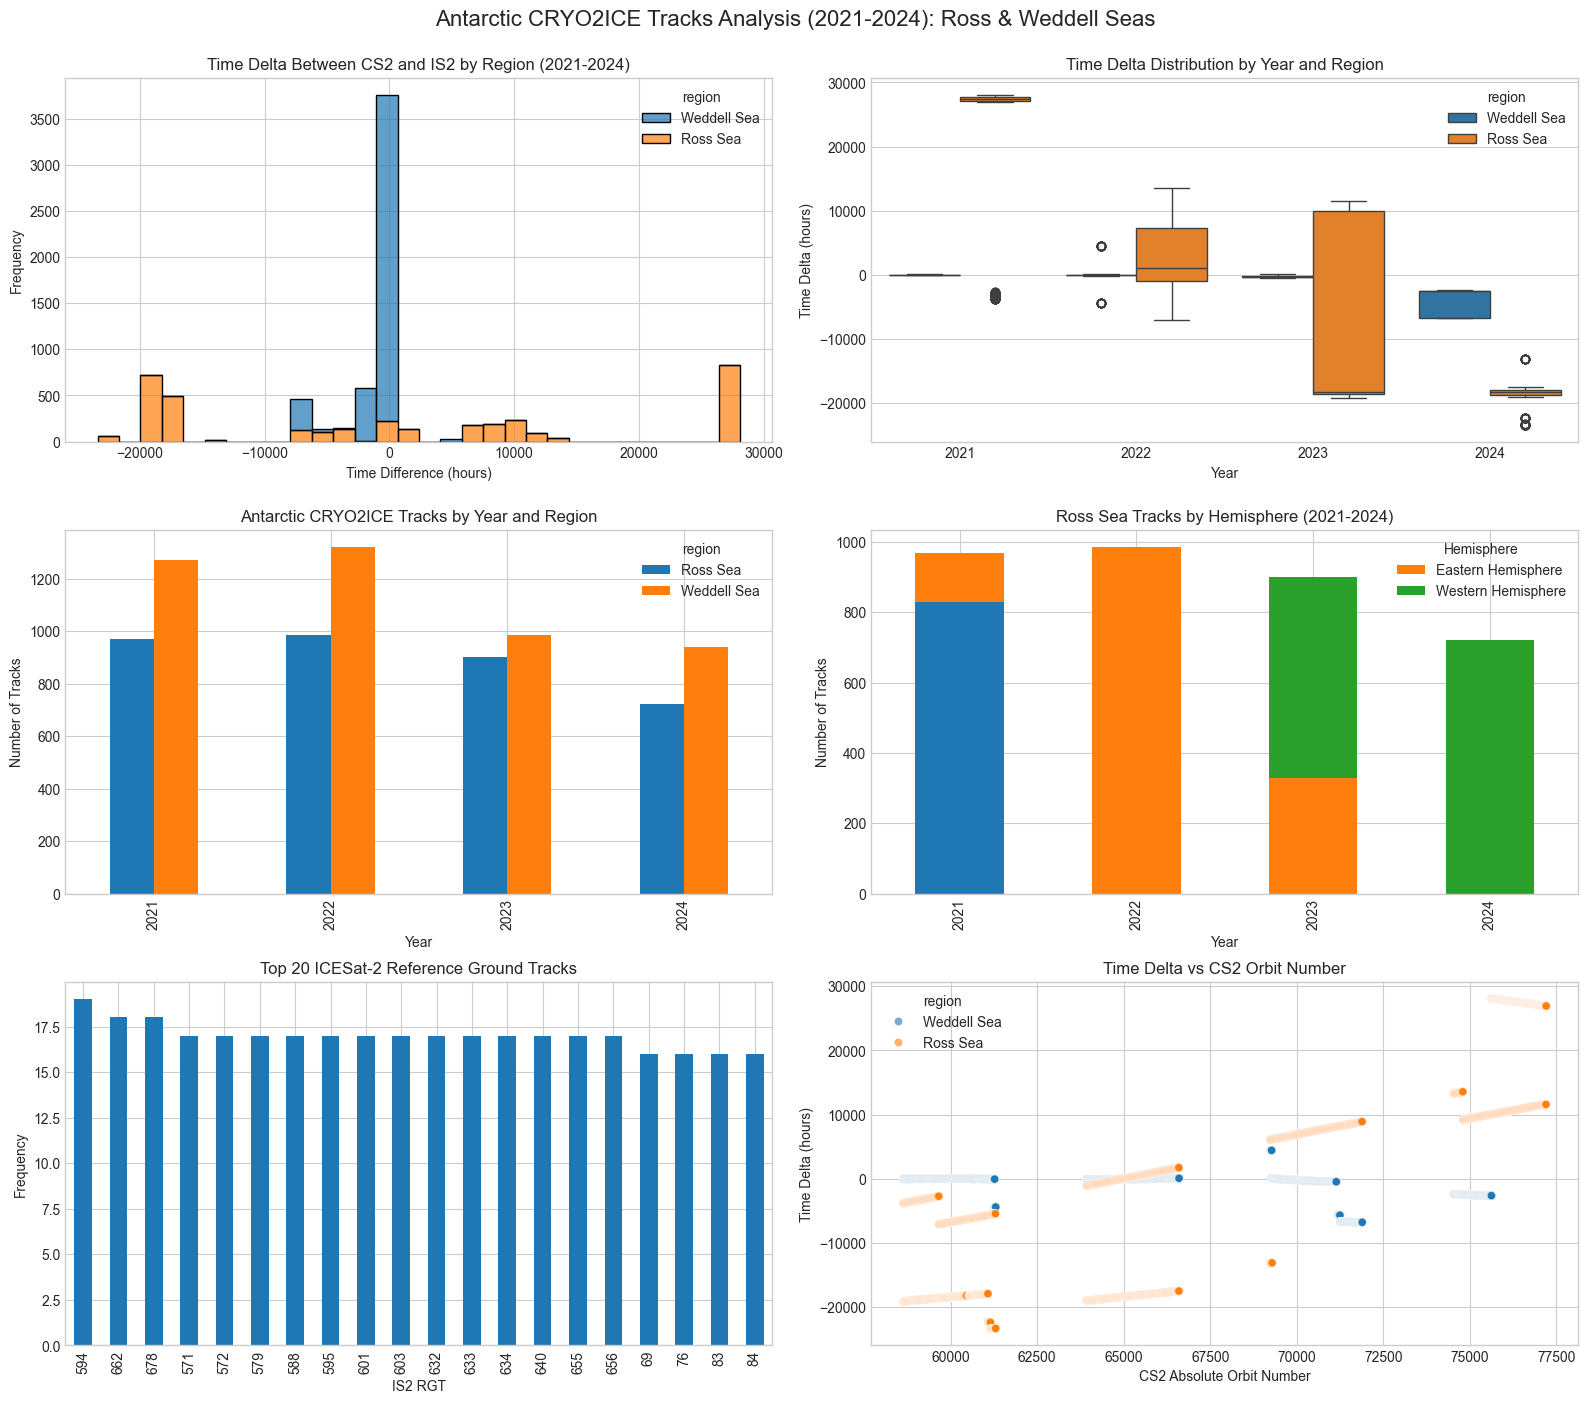


Visualization Context - Antarctic CRYO2ICE Data Summary:
Total tracks analyzed: 8089
Time period: 2021-2024
Regions: Weddell Sea (4513 tracks), Ross Sea (3576 tracks)


In [12]:
#%% Antarctic CRYO2ICE Data Visualization (2021-2024)

# Only run if we have data and visualization packages
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.gridspec import GridSpec
    import numpy as np

    # Determine which dataset to use (prefer the error-handled version if available)
    if 'cryo2ice_tracks_df_fixed' in locals() and not cryo2ice_tracks_df_fixed.empty:
        vis_df = cryo2ice_tracks_df_fixed
        print("Using error-handled dataset for visualization")
    elif 'cryo2ice_tracks_df' in locals() and not cryo2ice_tracks_df.empty:
        vis_df = cryo2ice_tracks_df
        print("Using standard dataset for visualization")
    else:
        print("No dataset available for visualization")
        raise ValueError("No track data available")
    
    # Set the style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create a figure with multiple visualizations
    fig = plt.figure(figsize=(16, 14))
    gs = GridSpec(3, 2, figure=fig)
    
    # Plot 1: Histogram of time deltas by region
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=vis_df, x='time_delta', hue='region', 
                 multiple='stack', palette=['#1f77b4', '#ff7f0e'], 
                 bins=30, kde=False, alpha=0.7, ax=ax1)
    ax1.set_title('Time Delta Between CS2 and IS2 by Region (2021-2024)', fontsize=12)
    ax1.set_xlabel('Time Difference (hours)')
    ax1.set_ylabel('Frequency')
    
    # Plot 2: Time delta box plot by year and region
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(data=vis_df, x='year', y='time_delta', hue='region', ax=ax2)
    ax2.set_title('Time Delta Distribution by Year and Region', fontsize=12)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Time Delta (hours)')
    
    # Plot 3: Track counts by year and region
    ax3 = fig.add_subplot(gs[1, 0])
    year_region_counts = vis_df.groupby(['year', 'region']).size().unstack()
    year_region_counts.plot(kind='bar', ax=ax3)
    ax3.set_title('Antarctic CRYO2ICE Tracks by Year and Region', fontsize=12)
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Number of Tracks')
    
    # Plot 4: Ross Sea Hemisphere Distribution
    ax4 = fig.add_subplot(gs[1, 1])
    ross_data = vis_df[vis_df['region'] == 'Ross Sea']
    if not ross_data.empty:
        ross_hemi_year = ross_data.groupby(['year', 'hemisphere']).size().unstack()
        ross_hemi_year.plot(kind='bar', stacked=True, ax=ax4)
        ax4.set_title('Ross Sea Tracks by Hemisphere (2021-2024)', fontsize=12)
        ax4.set_xlabel('Year')
        ax4.set_ylabel('Number of Tracks')
        ax4.legend(title='Hemisphere')
    else:
        ax4.text(0.5, 0.5, 'No Ross Sea data available', 
                 horizontalalignment='center', verticalalignment='center')
    
    # Plot 5: IS2 RGT Distribution
    ax5 = fig.add_subplot(gs[2, 0])
    rgt_counts = vis_df['IS2_RGT'].value_counts().sort_index()
    top_rgts = rgt_counts.nlargest(20)
    top_rgts.plot(kind='bar', ax=ax5)
    ax5.set_title('Top 20 ICESat-2 Reference Ground Tracks', fontsize=12)
    ax5.set_xlabel('IS2 RGT')
    ax5.set_ylabel('Frequency')
    
    # Plot 6: Scatter plot of time delta vs orbit number with region distinction
    ax6 = fig.add_subplot(gs[2, 1])
    sns.scatterplot(data=vis_df, x='CS2_abs_orbit_number', y='time_delta', 
                    hue='region', alpha=0.6, ax=ax6)
    ax6.set_title('Time Delta vs CS2 Orbit Number', fontsize=12)
    ax6.set_xlabel('CS2 Absolute Orbit Number')
    ax6.set_ylabel('Time Delta (hours)')
    
    plt.tight_layout()
    fig.suptitle('Antarctic CRYO2ICE Tracks Analysis (2021-2024): Ross & Weddell Seas', 
                 fontsize=16, y=0.999)
    plt.subplots_adjust(top=0.95)
    
    # Save the visualization if needed
    # plt.savefig(os.path.join(OUTPUT_DIR, "antarctic_cryo2ice_visualization_2021_2024.png"), 
    #            dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Additional summary statistics for context
    print("\nVisualization Context - Antarctic CRYO2ICE Data Summary:")
    print(f"Total tracks analyzed: {len(vis_df)}")
    print(f"Time period: 2021-2024")
    print(f"Regions: Weddell Sea ({len(vis_df[vis_df['region'] == 'Weddell Sea'])} tracks), "
          f"Ross Sea ({len(vis_df[vis_df['region'] == 'Ross Sea'])} tracks)")
    
except ImportError as e:
    print(f"Visualization packages not available: {str(e)}")
except Exception as e:
    print(f"Error during visualization: {str(e)}")